In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('BBC News Train.csv', sep=',')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
df.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [5]:
stopwords = set(stopwords.words('english'))

In [6]:
set(list(stopwords)[0:15]) #showing only the first 15 elements of the stopwords set

{'a',
 'above',
 'don',
 'for',
 'his',
 'is',
 'more',
 'now',
 'off',
 're',
 'too',
 'until',
 "wasn't",
 'we',
 'wouldn'}

In [7]:
len(stopwords)

179

In [8]:
contents_clean = []
for content_clean in df.Text:
    for word in stopwords:
        token = " " + word + " "
        content_clean = content_clean.replace(token, " ")
    contents_clean.append(content_clean)

In [9]:
df['content_clean'] = np.array(contents_clean)

In [10]:
df.head(10)

,ArticleId,Text,Category,content_clean
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses $168m payout eighteen former enro...
5,1582,howard truanted to play snooker conservative...,politics,howard truanted play snooker conservative le...
6,651,wales silent on grand slam talk rhys williams ...,sport,wales silent grand slam talk rhys williams say...
7,1797,french honour for director parker british film...,entertainment,french honour director parker british film dir...
8,2034,car giant hit by mercedes slump a slump in pro...,business,car giant hit mercedes slump slump profitabili...
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,fockers fuel festive film chart comedy meet fo...


C:\Users\ADMIN\anaconda32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

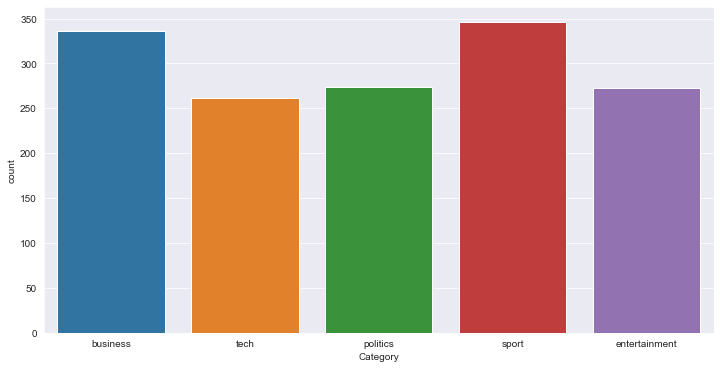

In [11]:
plt.figure(figsize = (12, 6))
sns.countplot(df.Category)

In [12]:
X = list(df.content_clean)
y = list(df.Category)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True)

In [14]:
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique labels in the train set:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique labels in the train set:
[['business' 'entertainment' 'politics' 'sport' 'tech']
 ['261' '227' '218' '283' '203']]


In [15]:
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique labels in the test set:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique labels in the test set:
[['business' 'entertainment' 'politics' 'sport' 'tech']
 ['75' '46' '56' '63' '58']]


In [16]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1192
1192
298
298


In [17]:
vocab_size = 15000
embedding_dim = 32
max_length = 256
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [18]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [19]:
X_train_sqncs = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sqncs, padding=padding_type, maxlen=max_length)

X_test_sqncs = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sqncs, padding=padding_type, maxlen=max_length)

print(len(X_test_sqncs))
print(X_test_padded.shape)

298
(298, 256)


In [20]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df.Category)
label_index = label_tokenizer.word_index

y_train_label_sqncs = np.array(label_tokenizer.texts_to_sequences(y_train))
y_test_label_sqncs = np.array(label_tokenizer.texts_to_sequences(y_test))

print(y_train_label_sqncs[0])
print(y_train_label_sqncs[1])
print(y_train_label_sqncs[2])
print(y_train_label_sqncs.shape)

print(y_test_label_sqncs[0])
print(y_test_label_sqncs[1])
print(y_test_label_sqncs[2])
print(y_test_label_sqncs.shape)

[1]
[2]
[3]
(1192, 1)
[4]
[3]
[3]
(298, 1)


In [21]:
len(word_index)

22765

In [22]:
dict(list(word_index.items())[0:15]) #showing only the first 15 elements of the word_index dictionary

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'new': 7,
 'people': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'first': 12,
 'two': 13,
 'last': 14,
 'time': 15}

In [23]:
label_index

{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 32)           480000    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 484,998
Trainable params: 484,998
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 35
history = model.fit(X_train_padded, y_train_label_sqncs, epochs=num_epochs, validation_data=(X_test_padded, y_test_label_sqncs), verbose=2)

Epoch 1/35
38/38 - 2s - loss: 1.7566 - accuracy: 0.3305 - val_loss: 1.7023 - val_accuracy: 0.3758 - 2s/epoch - 58ms/step
Epoch 2/35
38/38 - 1s - loss: 1.6040 - accuracy: 0.4169 - val_loss: 1.4921 - val_accuracy: 0.4732 - 578ms/epoch - 15ms/step
Epoch 3/35
38/38 - 1s - loss: 1.3179 - accuracy: 0.6477 - val_loss: 1.1798 - val_accuracy: 0.6745 - 580ms/epoch - 15ms/step
Epoch 4/35
38/38 - 1s - loss: 0.9654 - accuracy: 0.7869 - val_loss: 0.8375 - val_accuracy: 0.8691 - 588ms/epoch - 15ms/step
Epoch 5/35
38/38 - 1s - loss: 0.6211 - accuracy: 0.9379 - val_loss: 0.5588 - val_accuracy: 0.9362 - 610ms/epoch - 16ms/step
Epoch 6/35
38/38 - 1s - loss: 0.3635 - accuracy: 0.9698 - val_loss: 0.3605 - val_accuracy: 0.9664 - 576ms/epoch - 15ms/step
Epoch 7/35
38/38 - 1s - loss: 0.2118 - accuracy: 0.9874 - val_loss: 0.2544 - val_accuracy: 0.9799 - 578ms/epoch - 15ms/step
Epoch 8/35
38/38 - 1s - loss: 0.1319 - accuracy: 0.9950 - val_loss: 0.1954 - val_accuracy: 0.9799 - 588ms/epoch - 15ms/step
Epoch 9/35


In [26]:
y_pred = model.predict(X_test_padded)

10/10 [==============================] - 0s 4ms/step


In [27]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([4, 3, 3, 5, 5, 2, 5, 4, 2, 5, 3, 4, 2, 1, 5, 3, 2, 1, 3, 2, 5, 4,
       1, 2, 1, 5, 2, 1, 5, 2, 1, 2, 2, 3, 1, 5, 4, 2, 4, 2, 1, 2, 3, 2,
       1, 2, 3, 5, 3, 2, 1, 1, 2, 1, 3, 4, 4, 3, 2, 4, 5, 2, 4, 5, 5, 5,
       2, 5, 3, 3, 3, 1, 1, 1, 4, 4, 2, 3, 2, 2, 2, 1, 1, 1, 2, 4, 1, 2,
       2, 5, 4, 3, 3, 5, 2, 3, 5, 5, 4, 3, 4, 3, 4, 1, 5, 1, 3, 1, 2, 5,
       5, 2, 5, 4, 5, 2, 3, 2, 4, 2, 3, 1, 2, 3, 2, 2, 5, 5, 3, 4, 2, 1,
       4, 1, 2, 3, 2, 4, 2, 4, 2, 4, 5, 1, 4, 3, 2, 5, 3, 2, 1, 2, 5, 1,
       4, 5, 5, 1, 5, 1, 1, 3, 2, 2, 3, 3, 5, 1, 1, 5, 3, 5, 5, 4, 2, 5,
       4, 1, 2, 2, 1, 1, 5, 4, 4, 2, 5, 5, 4, 3, 1, 1, 3, 5, 1, 1, 3, 1,
       1, 2, 4, 3, 1, 4, 2, 1, 5, 5, 2, 2, 1, 3, 2, 4, 1, 3, 3, 1, 5, 3,
       1, 5, 2, 2, 4, 5, 2, 3, 3, 3, 3, 1, 1, 2, 2, 5, 2, 1, 1, 3, 3, 4,
       4, 4, 2, 2, 4, 4, 1, 4, 4, 3, 5, 1, 3, 5, 4, 1, 5, 2, 2, 3, 5, 5,
       5, 1, 1, 2, 3, 4, 1, 1, 5, 1, 1, 3, 1, 1, 2, 3, 4, 2, 2, 3, 2, 2,
       2, 5, 3, 4, 2, 2, 2, 2, 3, 4, 5, 4], dtype=i

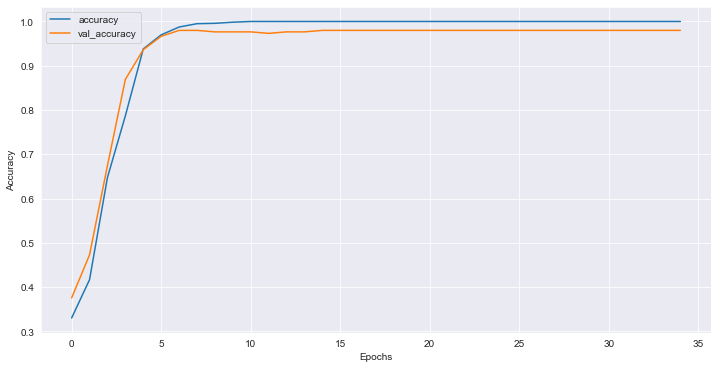

In [28]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

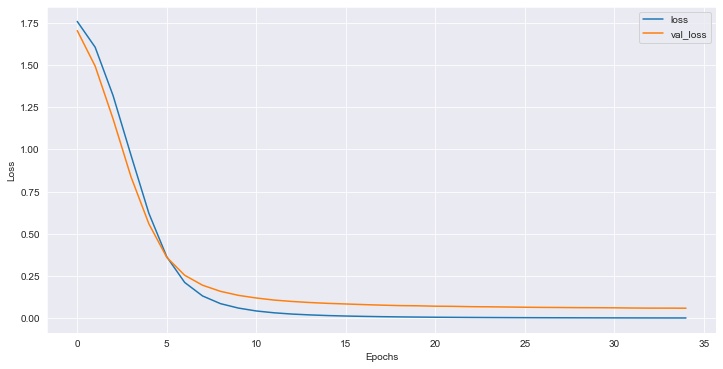

In [29]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_content(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

reverse_label_index = dict([(value, key) for (key, value) in label_index.items()])

def decode_labels(text):
    text = np.array([text])
    return ' '.join([reverse_label_index.get(i, '?') for i in text])

In [31]:
X_test[1]

'howard taunts blair splits tony blair feud gordon brown damaging way uk governed  tory leader michael howard claimed heated prime minister questions.  mr howard asked:  fight crime fighting   question later unveiled headline new tory campaign posters. mr blair dismissed talk splits said people priorities next elections would economic successes achieved labour.  stick whatever likes billboards something book public concentrate low mortgages  low inflation  low unemployment delivered failed   said. chancellor currently high-profile tour africa highlight new anti-poverty plans.  insisted still trusted mr blair  despite claims contrary new book.  brown britain  robert peston  says mutual animosity two men. claims mr blair said november 2003 would stand prime minister next election. went back pledge support cabinet allies suspicion mr brown manoeuvring  says.  mr peston book claimed mr brown told mr blair:  nothing could ever say could ever believe.  mr blair directly denied quote wednesda

In [32]:
y_test[1]

'politics'

In [33]:
decode_content(X_test_padded[34])

'chelsea <OOV> complaint barcelona assistant coach <OOV> ten cate branded chelsea expected complaint uefa pathetic blues poised complain alleged half time incident wednesday 2 1 loss nou camp source chelsea anger alleged talk barca boss frank <OOV> referee <OOV> <OOV> later dismissed didier drogba react way chelsea pathetic mourinho lied line ups ten cate said uefa said tunnel representative witnessed nothing unusual ordinary half time break spokesman william <OOV> said <OOV> says <OOV> greeted apologised opportunity say <OOV> game two uefa officials neither witnessed it referee dressing room locked and assistants people allowed in indeed londoners could receiving end punishment failing turn compulsory press conference defeat uefa <OOV> thomas <OOV> added unusual thing happened far concerned chelsea failed present press conference referee expected include alleged incidents report uefa weakening chelsea case <OOV> critical mourinho decision speak media match lot talking game surprisingl

In [34]:
X_test_sqncs1 = tokenizer.texts_to_sequences(['howard taunts blair splits tony blair feud gordon brown damaging way uk governed  tory leader michael howard claimed heated prime minister questions.  mr howard asked:  fight crime fighting   question later unveiled headline new tory campaign posters. mr blair dismissed talk splits said people priorities next elections would economic successes achieved labour.  stick whatever likes billboards something book public concentrate low mortgages  low inflation  low unemployment delivered failed   said. chancellor currently high-profile tour africa highlight new anti-poverty plans.  insisted still trusted mr blair  despite claims contrary new book.  brown britain  robert peston  says mutual animosity two men. claims mr blair said november 2003 would stand prime minister next election. went back pledge support cabinet allies suspicion mr brown manoeuvring  says.  mr peston book claimed mr brown told mr blair:  nothing could ever say could ever believe.  mr blair directly denied quote wednesday. insisted could deals premiership twice declined directly say whether offered quit.  tory leader countered agreements struck twice dinners chancellor. declared:  deals meals prime minister. wonder chancellor happy eater.  continued:  discipline schools discipline government  clean hospitals clean act   mr blair said would respond  tittle tattle books  promised hail labour record economy  waiting lists law order  polling day . later poster launch tory co-chairman liam fox said party would exploit opportunities show  juvenile  prime minister chancellor were.  labour staged show unity poster launch tuesday  mr brown joined alan milburn  mr blair controversially put charge election planning place chancellor. liberal democrat leader charles kennedy told bbc news:  government clearly split top. kind cosmetic exercise persuade anybody.  later week mr blair expected outline direction party next election manifesto. prime minister chancellor faced backbench discontent monday meeting parliamentary labour party claims made mr peston book.'])
X_test_padded1 = pad_sequences(X_test_sqncs1, padding=padding_type, maxlen=max_length)

In [35]:
y_pred1 = model.predict(X_test_padded1)

1/1 [==============================] - 0s 47ms/step


In [36]:
classes_x1=np.argmax(y_pred1,axis=1)
classes_x1

array([3], dtype=int64)

In [38]:
if 1 in classes_x1:
    print('sports')
if 2 in classes_x1:
    print('Business')
if 3 in classes_x1:
    print('Politics')
if 4 in classes_x1:
    print('Entertainment')
if 5 in classes_x1:
    print('Tech')

Politics
